In [25]:
import numpy as np
from sklearn.linear_model import ElasticNet, enet_path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, \
    lasso_path
from sklearn.linear_model import enet_path
from functions_Lasso import LSLassoCV
SEED = 11235813
import matplotlib.pyplot as plt
np.random.seed(SEED)

/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
n = 50
x_true = np.array([3]*15 + [0]*25)
sigma = 1
w = np.random.rand(50)
z1, z2, z3 = np.random.rand(n), np.random.rand(n), np.random.rand(n)
Z1 = np.tile(z1.reshape(n, -1), 5)
Z2 = np.tile(z2.reshape(n, -1), 5)
Z3 = np.tile(z2.reshape(n, -1), 5)
W1, W2, W3 = np.random.rand(n, 5), np.random.rand(n, 5), np.random.rand(n, 5)
W = np.random.rand(n, 25)

In [5]:
A = np.concatenate((Z1 + .01 * W1, Z2 + .01 * W2, Z3 + .01 * W3, W ),
                   axis=1)
b = A @ x_true + sigma * w
print(b)

alpha = np.array([0.01 * 1.58 ** l for l in range(1,11)])
lambda_ = np.array([0.01 * 2 ** l for l in range(1,16)])

[21.24270664 20.87666339 21.38127718 35.40223711 12.03572087 37.34489217
  8.8946578  32.72383628 22.25719717 35.56643322 22.25066035 20.06415322
 14.1242941  22.16264981 32.1887602  27.91604737 31.88146033 33.32917379
 24.19220136 36.27490426 16.18089201  9.98728441 15.12594486 28.70988733
 27.61046091 19.09295567  8.96437552 28.78428383 21.85884446 28.58215163
 12.43574463 21.84989679 42.76027449 42.457323   26.6291835  32.11106773
 28.29845252 10.88121175 19.63024386 39.68673809 38.44314051 11.79595847
 24.9112905  32.32350744 34.66134648 27.67450321 25.47805499 20.74612162
  8.19228953 19.32029332]


In [6]:
comb = [(alpha[i], lambda_[j]) for i in range(len(alpha)) for j in range(len(lambda_))]

In [7]:
print(comb)

[(0.0158, 0.02), (0.0158, 0.04), (0.0158, 0.08), (0.0158, 0.16), (0.0158, 0.32), (0.0158, 0.64), (0.0158, 1.28), (0.0158, 2.56), (0.0158, 5.12), (0.0158, 10.24), (0.0158, 20.48), (0.0158, 40.96), (0.0158, 81.92), (0.0158, 163.84), (0.0158, 327.68), (0.024964000000000004, 0.02), (0.024964000000000004, 0.04), (0.024964000000000004, 0.08), (0.024964000000000004, 0.16), (0.024964000000000004, 0.32), (0.024964000000000004, 0.64), (0.024964000000000004, 1.28), (0.024964000000000004, 2.56), (0.024964000000000004, 5.12), (0.024964000000000004, 10.24), (0.024964000000000004, 20.48), (0.024964000000000004, 40.96), (0.024964000000000004, 81.92), (0.024964000000000004, 163.84), (0.024964000000000004, 327.68), (0.039443120000000005, 0.02), (0.039443120000000005, 0.04), (0.039443120000000005, 0.08), (0.039443120000000005, 0.16), (0.039443120000000005, 0.32), (0.039443120000000005, 0.64), (0.039443120000000005, 1.28), (0.039443120000000005, 2.56), (0.039443120000000005, 5.12), (0.039443120000000005, 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=.3, random_state=SEED)

scores = []
a_sk = np.linspace(0.01, 1, 50)
b_sk = np.linspace(0.01, 1, 50)
comb_sk = [(a_sk[i], b_sk[j]) for i in range(len(a_sk)) for j in range(len(b_sk))]

for alph, lambd in comb_sk:
    eNet = ElasticNet(alpha=alph, l1_ratio=lambd, max_iter=10000, random_state=SEED)
    eNet.fit(X_train, y_train)
    scores.append(eNet.score(X_test, y_test))
    
print(scores)

[0.9943135649322976, 0.9945413564414018, 0.9947732022648637, 0.9950046646591231, 0.9952326318172675, 0.995456521684109, 0.9956769384842552, 0.9958565910065306, 0.9960308365423203, 0.9961953764534889, 0.9963543810700072, 0.9965108939617603, 0.9966647996097313, 0.9968262051962553, 0.996990716610128, 0.9971384808336344, 0.9972794572720607, 0.9974159423344828, 0.9975471568343067, 0.9976729549937423, 0.9977924432520645, 0.9979069564088676, 0.9980166868069649, 0.9981197857258464, 0.9982093266426387, 0.9982958094153994, 0.9983791158224435, 0.998459215418092, 0.9985355873760009, 0.9986014570085082, 0.9986584193948805, 0.9987132950409215, 0.9987709429210901, 0.9988220297439183, 0.9988617674068605, 0.998899002103269, 0.9989337346585347, 0.9989653685843765, 0.9989940853019549, 0.9990203129977036, 0.9990483054374232, 0.9990743767642338, 0.9990956927802808, 0.9991086164969203, 0.9991146362626082, 0.9991195795560962, 0.9991238213299415, 0.9991281379129843, 0.9991320914094232, 0.9991717628306662, 0.9

In [9]:
alph_best, lambd_best = comb_sk[np.argmax(scores)]
print(alph_best, lambd_best)

0.01 1.0


## Make enet !!!!

In [40]:
x_true.shape

(40,)

In [36]:
eNet = ElasticNet(alpha=alph_best, l1_ratio=lambd_best, max_iter=10000, random_state=SEED)
eNet.fit(X_train, y_train)
print(eNet.score(X_test, y_test))
alphas_enet, coefs_enet, _ = enet_path(
    A, b, alpha=alph_best, l1_ratio=lambd_best, fit_intercept=False) #chose the best alpha 

0.9991717628306662


## Test with LASSO first

In [27]:
alpha_max = 1
n_alphas = 30
eps = 1e-7

alphas = np.logspace(np.log10(alpha_max), np.log10(alpha_max * eps),
                     num=n_alphas)
_, x_lasso, _ = lasso_path(A, b, alphas=alphas, fit_intercept=False,
                               return_models=False)

coef_lslasso, index_lslasso = LSLassoCV(A, b, alphas, cv=5, max_iter=100000,
                                        tol=1e-7, fit_intercept=False)


/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006017635143010125, tolerance: 0.002599428791221946
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020836353133958596, tolerance: 0.002744508445159628
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009390298233807215, tolerance: 0.002599428791221946
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You migh

/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05301578616867597, tolerance: 0.002599428791221946
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023700935526050237, tolerance: 0.002810763144722324
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03674184015772175, tolerance: 0.0027829856910426176
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03498335321638346, tolerance: 0.002810763144722324
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016800818409980822, tolerance: 0.0027829856910426176
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029524518531270805, tolerance: 0.002744508445159628
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You migh

/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27309207897513865, tolerance: 0.002810763144722324
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2715866947826392, tolerance: 0.0027829856910426176
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27972496346073994, tolerance: 0.002744508445159628
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might w

/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2722670072630549, tolerance: 0.002810763144722324
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25279965801832144, tolerance: 0.0027829856910426176
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2907992546742277, tolerance: 0.002744508445159628
  positive)
/home/tanglef/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might wa

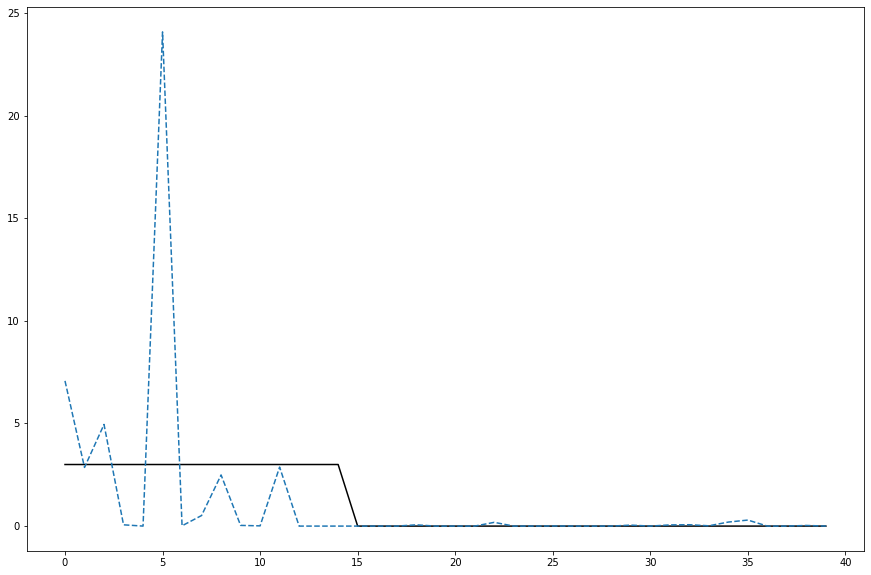

In [41]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(x_true, 'k', label="True signal")
ax.plot(x_lasso[:, index_lslasso], '--', label="Lasso")
#ax.plot(coefs_enet, '--', label="enet")

plt.show()